In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from scipy.stats import norm
import scipy
import math

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

Correlation between features 1 & 2
             features_1  features_2
features_1     1.00000    -0.00522
features_2    -0.00522     1.00000
Correlation between features 2 & 3
             features_2  features_3
features_2     1.00000     0.04736
features_3     0.04736     1.00000
Correlation between features 1 & 3
             features_1  features_3
features_1     1.00000     0.02369
features_3     0.02369     1.00000


'No, since plots are represented by blobs and the values of their matrix-correlation are close to zero '

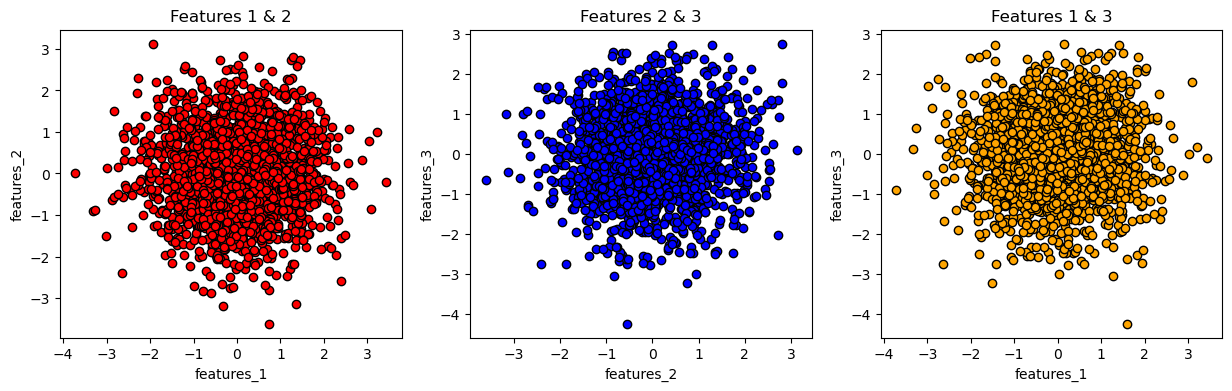

In [3]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ex_datavisualization/
data = pd.read_csv('ex_datavisualization/regression_generated.csv')

# create one figure with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# unpack ax1 and ax2 inline

ax1.scatter(x=data.loc[:,"features_1"], y=data.loc[:,"features_2"], marker='o', c='r', edgecolor='black')
ax1.set_title("Features 1 & 2")
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')

ax2.scatter(x=data.loc[:,"features_2"], y=data.loc[:,"features_3"], marker='o', c='b', edgecolor='black')
ax2.set_title("Features 2 & 3")
ax2.set_xlabel('features_2')
ax2.set_ylabel('features_3')

ax3.scatter(x=data.loc[:,"features_1"], y=data.loc[:,"features_3"], marker='o', c='orange', edgecolor='black')
ax3.set_title("Features 1 & 3")
ax3.set_xlabel('features_1')
ax3.set_ylabel('features_3')

corr12 = data.loc[:,["features_1","features_2"]].corr()
corr23= data.loc[:,["features_2","features_3"]].corr()
corr13= data.loc[:,["features_1","features_3"]].corr()
print("Correlation between features 1 & 2\n", corr12)
print("Correlation between features 2 & 3\n", corr23)
print("Correlation between features 1 & 3\n", corr13)

#Are these features correlated?
'''No, since plots are represented by blobs and the values of their matrix-correlation are close to zero '''

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

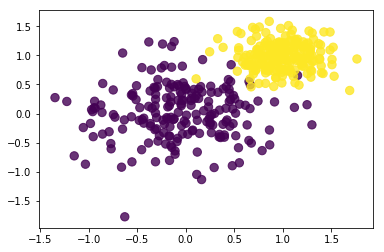

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

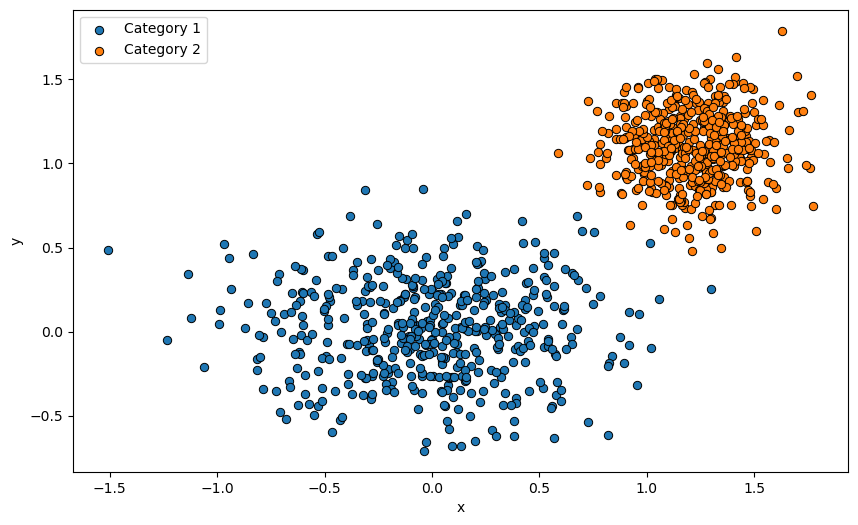

In [25]:
def dataset2D(mx1, devx1, my1,devy1, mx2, devx2, my2,devy2):
    cat1 = generateCategory(mx1, devx1, my1,devy1)
    cat2 = generateCategory(mx2, devx2, my2,devy2)
    return cat1, cat2

def generateCategory(mx, devx, my,devy):
    # Generate random data for each category
    x = np.random.normal(loc=mx, scale=devx, size=500)
    y = np.random.normal(loc=my, scale=devy, size=500)
    return x,y

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes 

(x1, y1),(x2, y2) = dataset2D(mx1=0,devx1=0.4,my1=0,devy1=0.3,mx2=1.2,devx2=0.2,my2=1.1,devy2=0.2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x1,y1, edgecolor='black', linewidth=0.7)
ax.scatter(x2,y2, edgecolor='black', linewidth=0.7)
ax.legend(["Category 1","Category 2"],loc="upper left") 

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ./ex_datavisualization/

Full dataframe
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
Dataframe with absolute values of the variable "residual"< 2
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]
Correlation matrix of residuals-distances
            residuals  distances
residuals   1.000000   0.056598
distances   0.056598   1.000000


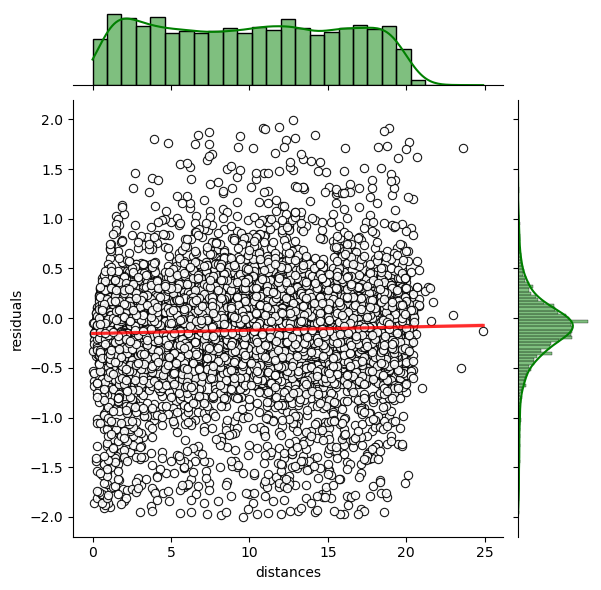

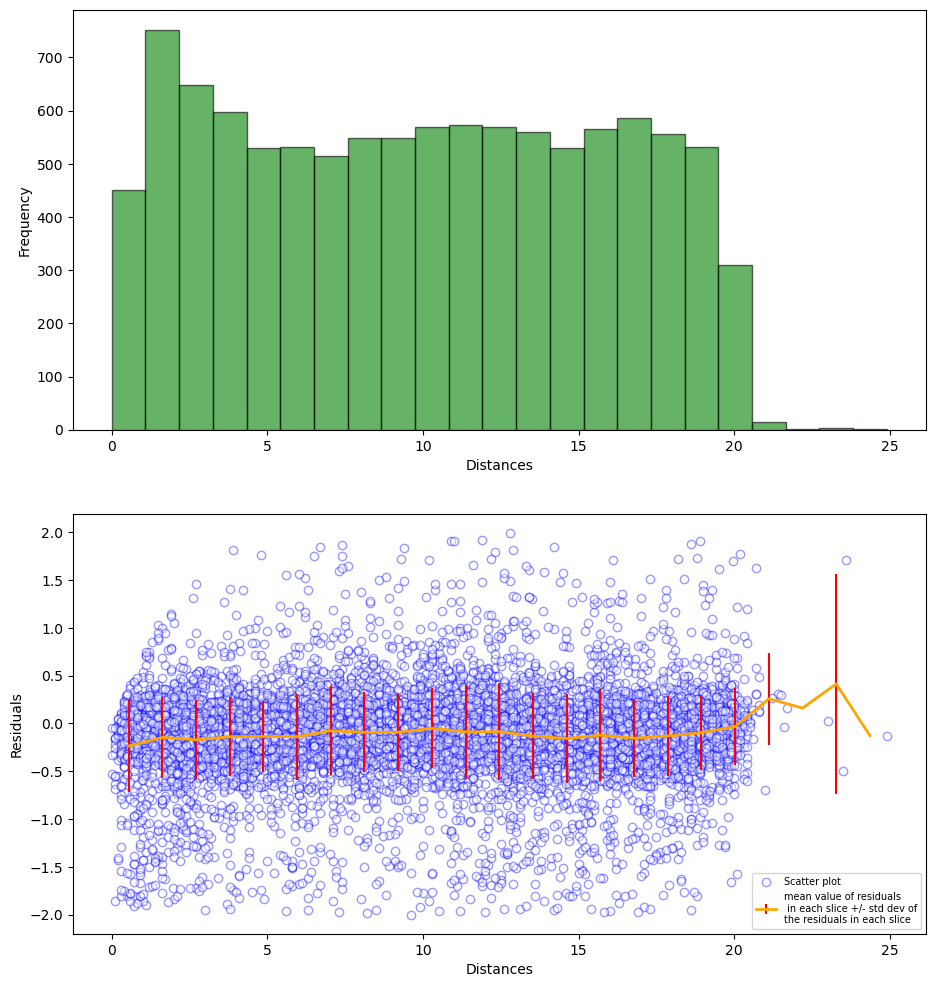

In [105]:
#inspect the dataset, you'll find two variables (features)
# define the data structure
filename = "./ex_datavisualization/residuals_261.pkl"
a = pd.read_pickle(filename) 
dic = a.tolist()
#Convert the content to a Pandas Dataframe
dataframe = pd.DataFrame(dic, columns = ["residuals", "distances"] )
print("Full dataframe\n",dataframe)

#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
reduced = dataframe.query("abs(residuals) < 2")
print("Dataframe with absolute values of the variable \"residual\"< 2\n", reduced)
#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
p = sns.jointplot(data=reduced, x="distances", y="residuals",kind="reg",color='green',joint_kws={'scatter_kws':{"color": "white", "alpha": 0.9, 'edgecolor':'black', 'linewidth':0.8},'line_kws':{'color':'red', 'alpha':0.8}})


'''Comment on the correlation between these variables.'''
correlation_matrix = dataframe.loc[:,["residuals","distances"]].corr()
print("Correlation matrix of residuals-distances\n", correlation_matrix)
'''The two variables aren't correlated as we can see from the matrix: the coefficients are close to zero  '''

#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(11,12)) # create the figure and the axes
hist, bins, _ = ax[0].hist(reduced['distances'], bins=23, range=(reduced['distances'].min(), reduced['distances'].max()), density=False, cumulative=False, color='green',edgecolor='black', alpha=0.6) 
ax[0].set_xlabel("Distances")
ax[0].set_ylabel("Frequency")

#Obtain 3 numpy arrays:
#x, the array of bin centers of the profile histogram of the "distance" variable
x = 0.5*(bins[1:] + bins[:-1])

#y, the mean values of the "residuals", estimated in slices (bins) of "distance"
y = np.zeros(len(bins)-1) #we have len(bins)-1 slices
for i in range(1,len(bins)):
    mask = (reduced["distances"]<= bins[i]) & (bins[i-1] <= reduced["distances"])
    slice = reduced[mask] 
    y[i-1] = slice["residuals"].mean()  
    
#err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
err_y = np.zeros(len(bins)-1) #we have len(bins)-1 slices
for i in range(1,len(bins)):
    mask = (reduced["distances"]<= bins[i]) & (bins[i-1] <= reduced["distances"])
    slice = reduced[mask] 
    err_y[i-1] = slice["residuals"].std()  
    
#Plot the profile plot on top of the scatter plot 
ax[1].scatter(reduced['distances'],reduced['residuals'],color='white', edgecolor='blue', alpha=0.4)
ax[1].errorbar(x,y, err_y, color='orange', ecolor = 'red', elinewidth=1.5, linewidth = 2)

ax[1].set_xlabel("Distances")
ax[1].set_ylabel("Residuals")
ax[1].legend(["Scatter plot", "mean value of residuals\n in each slice +/- std dev of\nthe residuals in each slice" ], loc = 'lower right', fontsize=7)


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Poisson uncertainty for each bin
 [2.23606798 3.16227766 3.87298335 5.56776436 4.24264069 3.60555128
 2.23606798 1.73205081]
[[2.46626217e-03 2.55416163e-03 2.64483142e-03 ... 1.01360832e-17
  9.15677623e-18 8.27095239e-18]
 [1.02890220e-05 1.08404783e-05 1.14199258e-05 ... 1.17226471e-12
  1.07736619e-12 9.90014329e-13]
 [6.99326268e-10 7.52410942e-10 8.09414255e-10 ... 9.43928673e-08
  8.85885800e-08 8.31298099e-08]
 ...
 [4.41431278e-31 5.06161460e-31 5.80303956e-31 ... 2.20232369e-01
  2.20277644e-01 2.20292738e-01]
 [1.87214823e-14 2.05000158e-14 2.24444332e-14 ... 1.04324089e-04
  9.96464580e-05 9.51655176e-05]
 [5.63406551e-05 5.90840302e-05 6.19524971e-05 ... 6.12943651e-14
  5.60701956e-14 5.12842580e-14]]


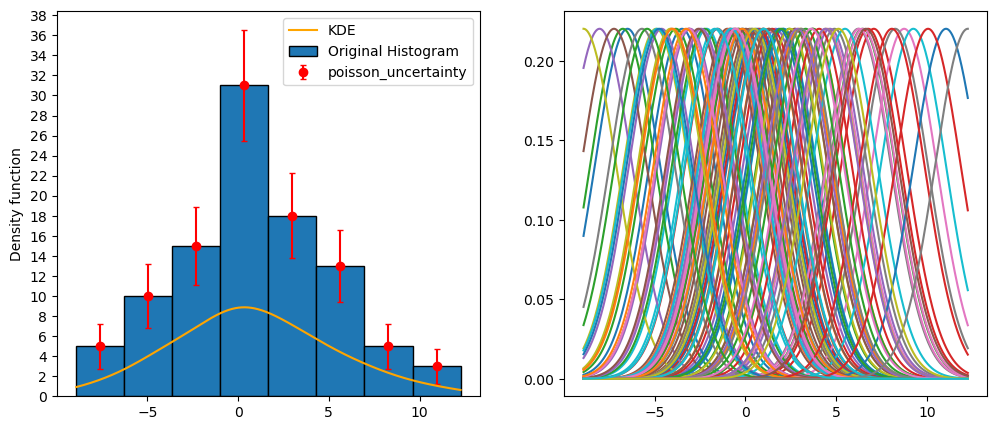

In [81]:
from scipy.stats import norm
import scipy
import math

#Fill a numpy array x of length N (with  𝑁=O(100)) with a variable normally distributed, with a given mean and standard deviation
mean = 0
x = npr.normal(loc=mean, scale=5, size=100)
num_points = x.shape[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) # create the figure and the axes
h, bins, _ = ax[0].hist(x, bins=8, range=(x.min(),x.max()), density=False, cumulative=False, edgecolor='black')
ax[0].set_ylabel("Density function")

ax[0].yaxis.set_major_locator(plt.MultipleLocator(2))
#ax[0].yaxis.set_major_formatter('{x:.0f}')
centers = 0.5*(bins[1:]+bins[:-1])
poisson_uncertainty = np.zeros(8)
for i in range(1,len(bins)):
    mask = (x<= bins[i]) & (bins[i-1] <= x)
    slice = x[mask] 
    poisson_uncertainty[i-1]  = math.sqrt(slice.shape[0])  

print("Poisson uncertainty for each bin\n", poisson_uncertainty)
ax[0].errorbar(x = centers, y = h, color = 'red', yerr = poisson_uncertainty, fmt = 'o', capsize = 2)

#For every element of x, create a gaussian 

g = np.zeros((num_points, 1000))

default_dev = 1.06*x.std()*x.size**(-1/5)

r =np.linspace(x.min(),x.max(), 1000)

i = 0

for xi in x:
    g[i]=norm.pdf(r,loc=xi, scale=default_dev)
    i += 1
for gaussian in g:
    ax[1].plot(r,gaussian)
   
print(g)
density = np.sum(g, axis=0)
integral_original_histo = scipy.integrate.trapz(h)
s=scipy.integrate.trapz(density,r)
normalized = (density / s) * integral_original_histo
ax[0].plot(r,normalized, color='orange')
ax[0].legend(["KDE","Original Histogram","poisson_uncertainty"])
